In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def f(x, y):
    return ( x + y **2)

In [4]:
learning_rate = 0.1
num_iterations = 20
x0 = -1.0
y0 = -0.5
# 记录函数值
loss_values = []

x_values = [x0]
y_values = [y0]
# 执行梯度下降并记录函数值
x = torch.tensor(x0, requires_grad=True)
y = torch.tensor(y0, requires_grad=True)
for i in range(num_iterations):
    loss = f(x, y)
    loss_values.append(loss.item())
    loss.backward()
    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad
        x.grad.zero_()
        y.grad.zero_()
    x_values.append(x.item())
    y_values.append(y.item())

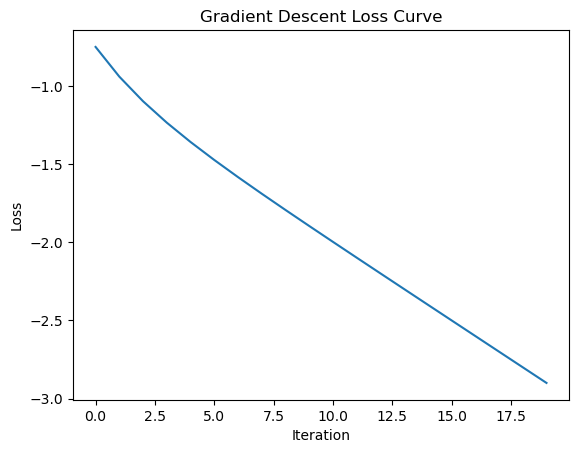

In [5]:
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curve')
plt.show()

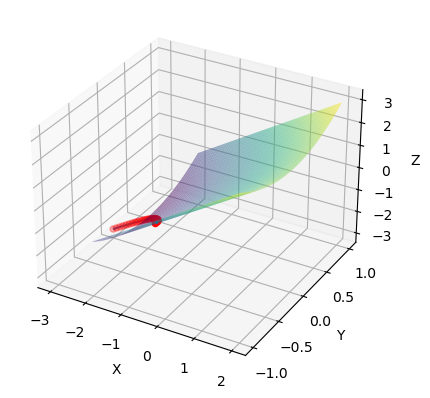

In [6]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.scatter(x_values, y_values, [f(x_val, y_val) for x_val, y_val in zip(x_values, y_values)], color='r')

for i in range(1, len(x_values)):
    x1, y1 = x_values[i-1], y_values[i-1]
    x2, y2 = x_values[i], y_values[i]
    u = x2 - x1
    v = y2 - y1
    w = f(x2, y2) - f(x1, y1)
    z1 = f(x1, y1)
    z2 = f(x2, y2)
    length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    ax.quiver(x1, y1, f(x1, y1), u, v, w, length=length, normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()